<div style="padding:10px;
            color:rgb(85, 88, 218);
            margin:10px;
            font-size:250%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(128, 157, 221);
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Imports</b>
</div>

In [340]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

<div style="padding:10px;
            color:rgb(85, 88, 218);
            margin:10px;
            font-size:250%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(128, 157, 221);
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>1- loading dataset</b>
</div>

In [341]:
df = pd.read_csv("diabetes_dataset00.csv")

<div style="padding:10px;
            color:rgb(85, 88, 218);
            margin:10px;
            font-size:175%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(128, 157, 221);
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>1.1 explore data and under standing</b>
</div>

In [342]:
df.shape

(70000, 34)

In [343]:
df.head()

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,40,44,38,High,Healthy,...,76,No,No,Positive,3,Normal,56,Ketones Present,2629,No
1,Neonatal Diabetes Mellitus (NDM),Positive,Negative,No,Present,13,1,17,High,Healthy,...,60,Yes,No,Negative,1,Normal,28,Glucose Present,1881,Yes
2,Prediabetic,Positive,Positive,Yes,Present,27,36,24,High,Unhealthy,...,80,Yes,No,Negative,1,Abnormal,55,Ketones Present,3622,Yes
3,Type 1 Diabetes,Negative,Positive,No,Present,8,7,16,Low,Unhealthy,...,89,Yes,No,Positive,2,Abnormal,60,Ketones Present,3542,No
4,Wolfram Syndrome,Negative,Negative,Yes,Present,17,10,17,High,Healthy,...,41,No,No,Positive,1,Normal,24,Protein Present,1770,No


In [344]:
df.columns

Index(['Target', 'Genetic Markers', 'Autoantibodies', 'Family History',
       'Environmental Factors', 'Insulin Levels', 'Age', 'BMI',
       'Physical Activity', 'Dietary Habits', 'Blood Pressure',
       'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels',
       'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
       'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Cystic Fibrosis Diagnosis',
       'Steroid Use History', 'Genetic Testing', 'Neurological Assessments',
       'Liver Function Tests', 'Digestive Enzyme Levels', 'Urine Test',
       'Birth Weight', 'Early Onset Symptoms'],
      dtype='object')

In [345]:
for column in df.columns :
    print(f"unique values in {column} : {df[column].unique()} \n")

unique values in Target : ['Steroid-Induced Diabetes' 'Neonatal Diabetes Mellitus (NDM)'
 'Prediabetic' 'Type 1 Diabetes' 'Wolfram Syndrome' 'LADA'
 'Type 2 Diabetes' 'Wolcott-Rallison Syndrome' 'Secondary Diabetes'
 'Type 3c Diabetes (Pancreatogenic Diabetes)' 'Gestational Diabetes'
 'Cystic Fibrosis-Related Diabetes (CFRD)' 'MODY'] 

unique values in Genetic Markers : ['Positive' 'Negative'] 

unique values in Autoantibodies : ['Negative' 'Positive'] 

unique values in Family History : ['No' 'Yes'] 

unique values in Environmental Factors : ['Present' 'Absent'] 

unique values in Insulin Levels : [40 13 27  8 17 29 10 47 21 16 22  9 38 14 12 30 19 42 34 11 24 44 20 15
 18  6 28 48  5 46 26 45 33 23 41 39  7 31 35 25 32 36 43 49 37] 

unique values in Age : [44  1 36  7 10 41 30  3 47 72 67 29 59  0 45 53 60 16 35 14 64  9 65 34
 51 11 56 37 22 70 33 50 62 40 28 12 38 19 39 46 43 77 73 32  5 49 26 52
 21 54 18 42 31 23 58 13  8 48 55 17 24 25 79  6  2  4 69 27 15 61 20 66
 68 78 57 71

In [346]:
type(df['Target']) # mean the type of data structure

pandas.core.series.Series

In [347]:
print(df['Target'].dtype) # mean the type of the storied data

object


In [348]:
df.describe()

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,Neurological Assessments,Digestive Enzyme Levels,Birth Weight
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,21.607443,32.020700,24.782943,111.339543,194.867200,35.051657,160.701657,15.496414,47.564243,70.264671,1.804157,46.420529,3097.061071
std,10.785852,21.043173,6.014236,19.945000,44.532466,6.803461,48.165547,9.633096,19.984683,11.965600,0.680154,19.391089,713.837300
min,5.000000,0.000000,12.000000,60.000000,100.000000,20.000000,80.000000,0.000000,10.000000,30.000000,1.000000,10.000000,1500.000000
25%,13.000000,14.000000,20.000000,99.000000,163.000000,30.000000,121.000000,7.000000,32.000000,63.000000,1.000000,31.000000,2629.000000
50%,19.000000,31.000000,25.000000,113.000000,191.000000,34.000000,152.000000,16.000000,46.000000,72.000000,2.000000,48.000000,3103.000000
75%,28.000000,49.000000,29.000000,125.000000,225.000000,39.000000,194.000000,22.000000,64.000000,79.000000,2.000000,61.000000,3656.250000
max,49.000000,79.000000,39.000000,149.000000,299.000000,54.000000,299.000000,39.000000,99.000000,89.000000,3.000000,99.000000,4499.000000


In [349]:
df.isna().sum()

Target                           0
Genetic Markers                  0
Autoantibodies                   0
Family History                   0
Environmental Factors            0
Insulin Levels                   0
Age                              0
BMI                              0
Physical Activity                0
Dietary Habits                   0
Blood Pressure                   0
Cholesterol Levels               0
Waist Circumference              0
Blood Glucose Levels             0
Ethnicity                        0
Socioeconomic Factors            0
Smoking Status                   0
Alcohol Consumption              0
Glucose Tolerance Test           0
History of PCOS                  0
Previous Gestational Diabetes    0
Pregnancy History                0
Weight Gain During Pregnancy     0
Pancreatic Health                0
Pulmonary Function               0
Cystic Fibrosis Diagnosis        0
Steroid Use History              0
Genetic Testing                  0
Neurological Assessm

<div style="padding:10px;
            color:rgb(85, 88, 218);
            margin:10px;
            font-size:250%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(128, 157, 221);
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>2- visualization for understanding the relations</b>
</div>

<div style="padding:10px;
            color:rgb(85, 88, 218);
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(128, 157, 221);
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>2- Exploratory Data Analysis </b>
</div>

<div style="padding:10px;
            color:rgb(85, 88, 218);
            margin:10px;
            font-size:175%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(128, 157, 221);
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>2.1 UniVariate Analysis</b>
</div>

<div style="padding:10px;
            color:rgb(85, 88, 218);
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(128, 157, 221);
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Age column</b>
</div>

In [350]:
df['Age'].describe()

count    70000.000000
mean        32.020700
std         21.043173
min          0.000000
25%         14.000000
50%         31.000000
75%         49.000000
max         79.000000
Name: Age, dtype: float64

In [351]:
df['Age'].value_counts()

Age
1     3165
0     2655
10    1493
14    1437
11    1408
      ... 
72     246
70     245
71     235
73     228
77     227
Name: count, Length: 80, dtype: int64

<Axes: xlabel='Age', ylabel='count'>

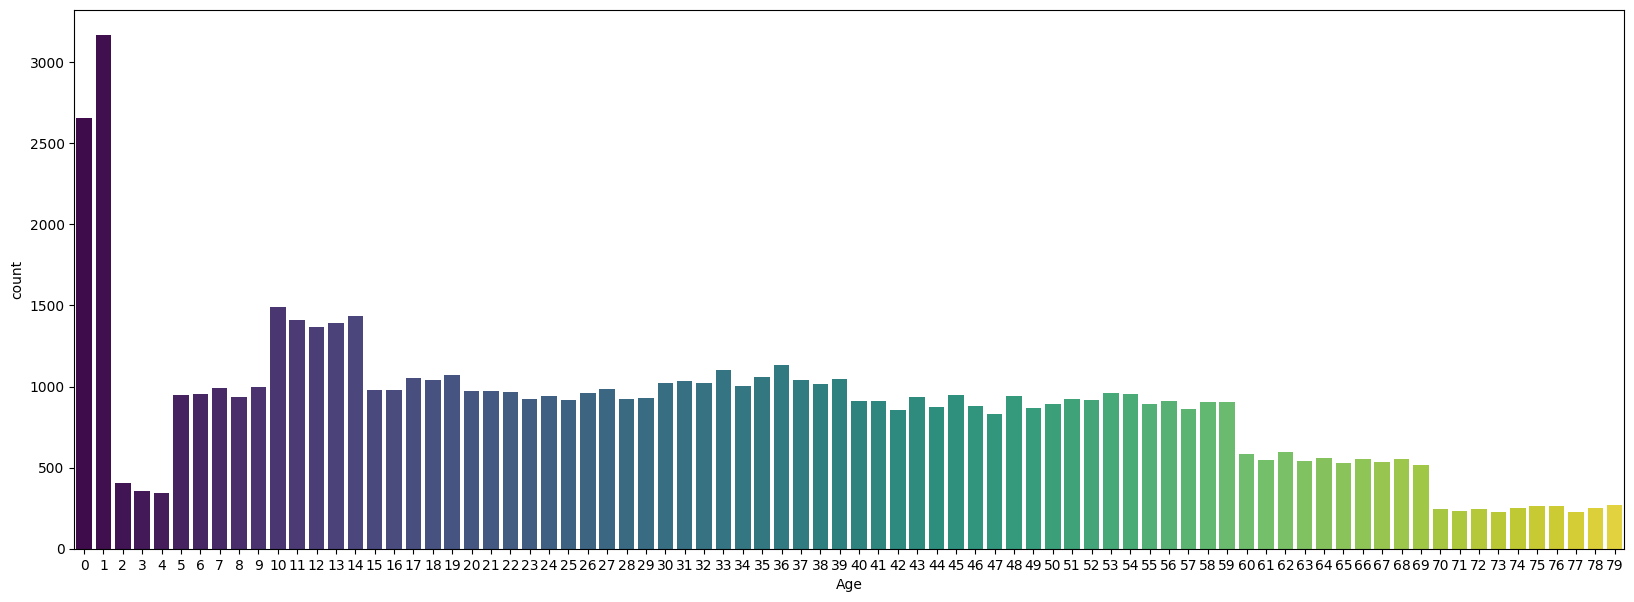

In [352]:
plt.figure(figsize=(20, 7))
sns.countplot(data=df, x='Age', palette='viridis',legend=False,hue='Age') 

##### The age distribution is left skewed (more fromm 0-30)

<div style="padding:10px;
            color:rgb(85, 88, 218);
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(128, 157, 221);
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>BMI (Body Mass Index) column</b>
</div>

In [353]:
df['BMI'].describe()

count    70000.000000
mean        24.782943
std          6.014236
min         12.000000
25%         20.000000
50%         25.000000
75%         29.000000
max         39.000000
Name: BMI, dtype: float64

In [354]:
df['BMI'].value_counts()

BMI
24    4864
27    4184
26    4146
25    4080
28    4016
22    3804
23    3796
20    3426
21    3357
18    3100
19    3075
29    3034
32    2658
30    2650
34    2626
33    2626
31    2592
17    2313
16    2277
15    2256
12     693
14     692
13     667
38     638
36     612
35     611
37     609
39     598
Name: count, dtype: int64

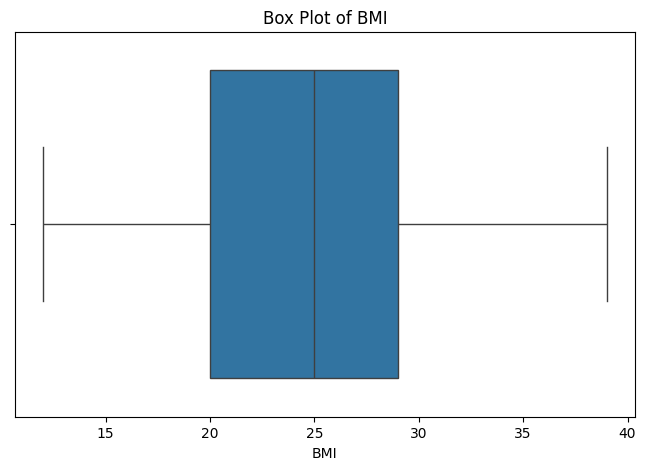

In [355]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['BMI'])
plt.title('Box Plot of BMI')
plt.xlabel('BMI')
plt.show()

<Axes: xlabel='BMI', ylabel='count'>

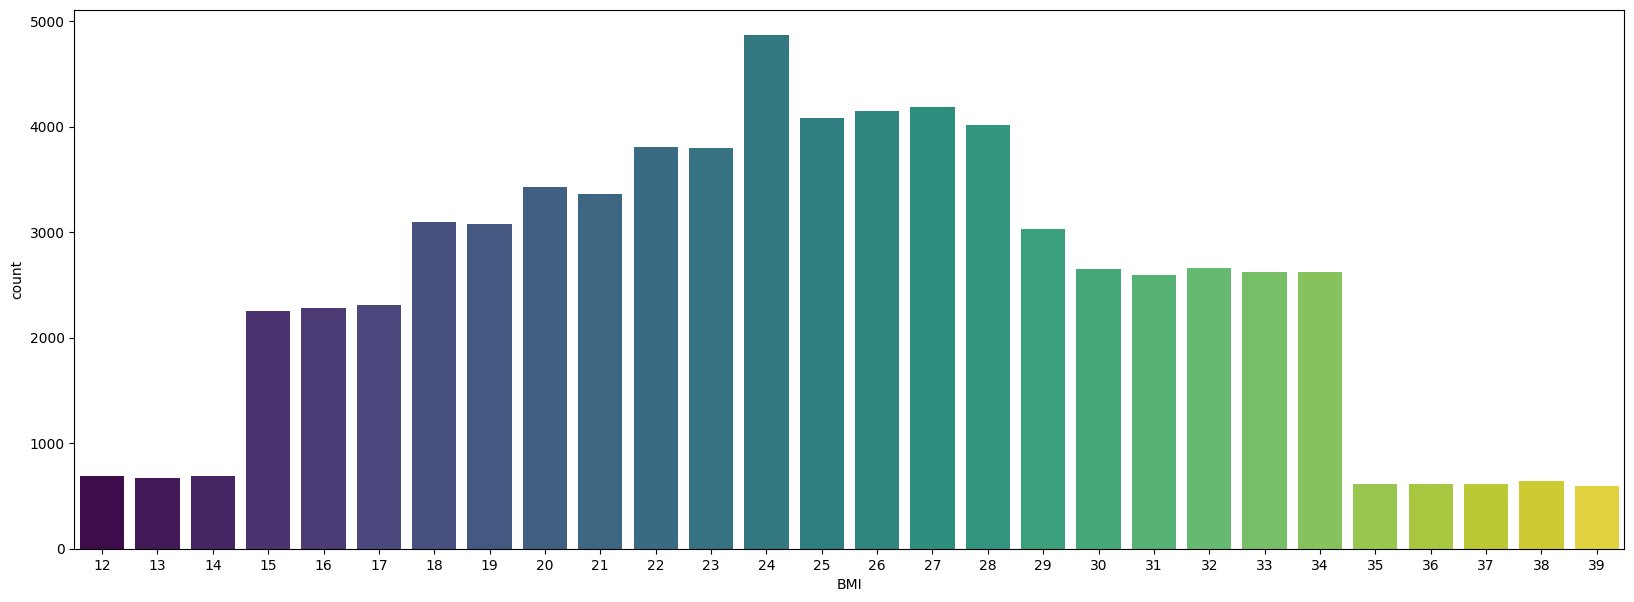

In [356]:
plt.figure(figsize=(20, 7))
sns.countplot(data=df, x='BMI', palette='viridis',legend=False,hue='BMI') 

##### The BMI distribution is unimodal (meaning that the people with avg BMI are the highest )

<div style="padding:10px;
            color:rgb(85, 88, 218);
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(128, 157, 221);
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Blood Glucose Levels column</b>
</div>

In [357]:
df['Blood Glucose Levels'].describe()

count    70000.000000
mean       160.701657
std         48.165547
min         80.000000
25%        121.000000
50%        152.000000
75%        194.000000
max        299.000000
Name: Blood Glucose Levels, dtype: float64

In [358]:
df['Blood Glucose Levels'].value_counts

<bound method IndexOpsMixin.value_counts of 0        168
1        178
2        105
3        121
4        289
        ... 
69995    227
69996    149
69997    143
69998    126
69999    117
Name: Blood Glucose Levels, Length: 70000, dtype: int64>

<Axes: xlabel='Blood Glucose Levels', ylabel='Count'>

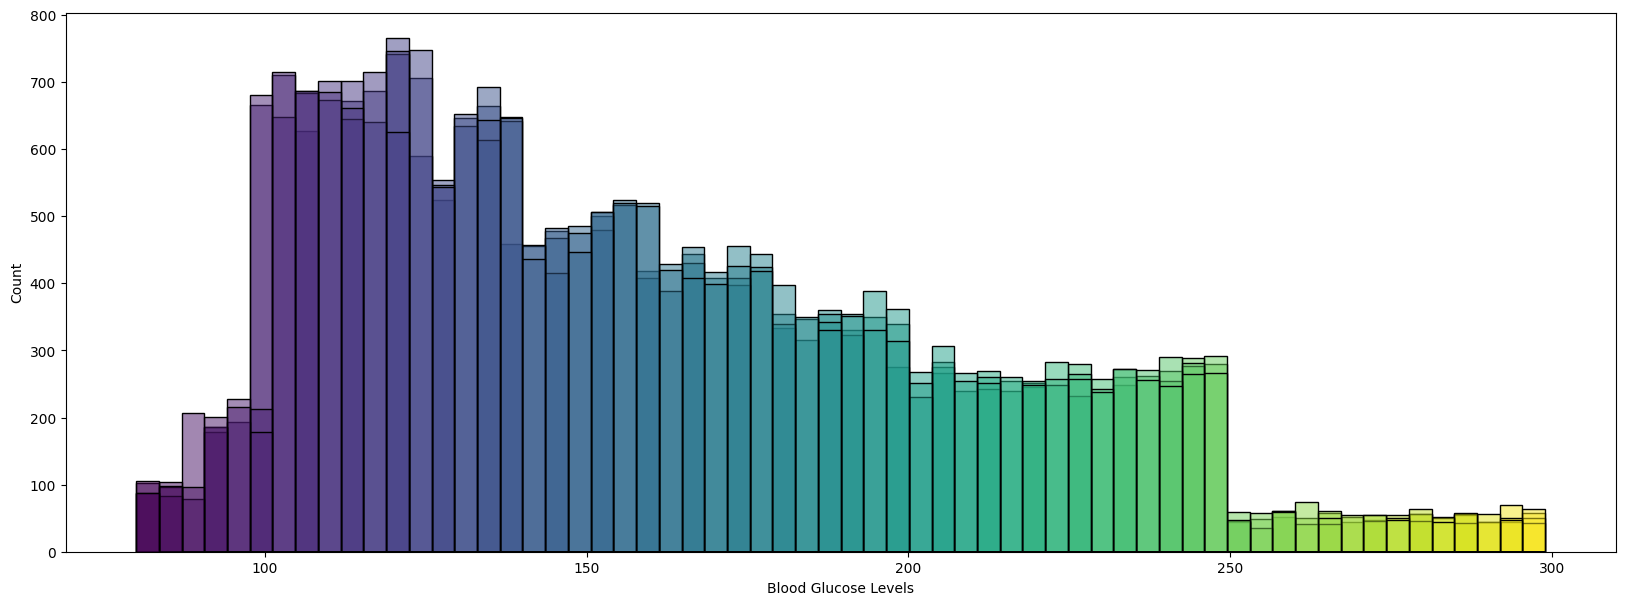

In [359]:
plt.figure(figsize=(20, 7))
sns.histplot(data=df, x='Blood Glucose Levels', palette='viridis', legend=False, hue='Blood Glucose Levels')

##### The Glocose level hist plot is left skewed meaning that the people with low glucose levels are the highest 

<div style="padding:10px;
            color:rgb(85, 88, 218);
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(128, 157, 221);
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Pregnancy History column</b>
</div>

In [360]:
df['Pregnancy History'].describe()

count      70000
unique         2
top       Normal
freq       35270
Name: Pregnancy History, dtype: object

In [361]:
df['Pregnancy History'].value_counts()

Pregnancy History
Normal           35270
Complications    34730
Name: count, dtype: int64

<Axes: ylabel='count'>

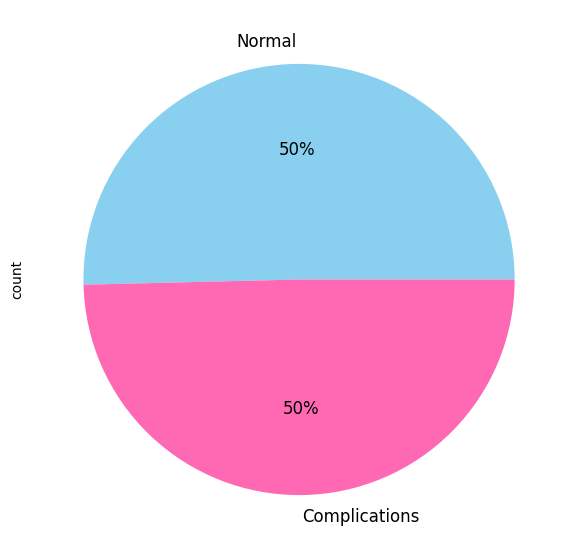

In [362]:
plt.figure(figsize=(15, 7))
counts = df['Pregnancy History'].value_counts()
counts.plot(kind = 'pie', fontsize = 12, colors = colors, autopct = '%1.0f%%')

<div style="padding:10px;
            color:rgb(85, 88, 218);
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(128, 157, 221);
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Alcohol Consumption column</b>
</div>

In [363]:
df['Alcohol Consumption'].describe()

count     70000
unique        3
top         Low
freq      23411
Name: Alcohol Consumption, dtype: object

In [364]:
df['Alcohol Consumption'].value_counts()

Alcohol Consumption
Low         23411
Moderate    23343
High        23246
Name: count, dtype: int64

<Axes: ylabel='count'>

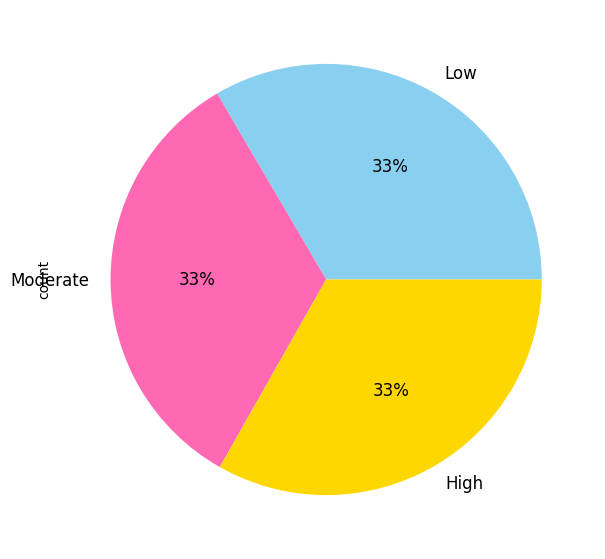

In [365]:
plt.figure(figsize=(15, 7))
counts = df['Alcohol Consumption'].value_counts()
counts.plot(kind = 'pie', fontsize = 12, colors = colors, autopct = '%1.0f%%')

##### The alcohol users are normally distributed 

<div style="padding:10px;
            color:rgb(85, 88, 218);
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(128, 157, 221);
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Blood Pressure column</b>
</div>

In [366]:
df['Blood Pressure'].describe()

count    70000.000000
mean       111.339543
std         19.945000
min         60.000000
25%         99.000000
50%        113.000000
75%        125.000000
max        149.000000
Name: Blood Pressure, dtype: float64

<Axes: xlabel='Blood Pressure', ylabel='Count'>

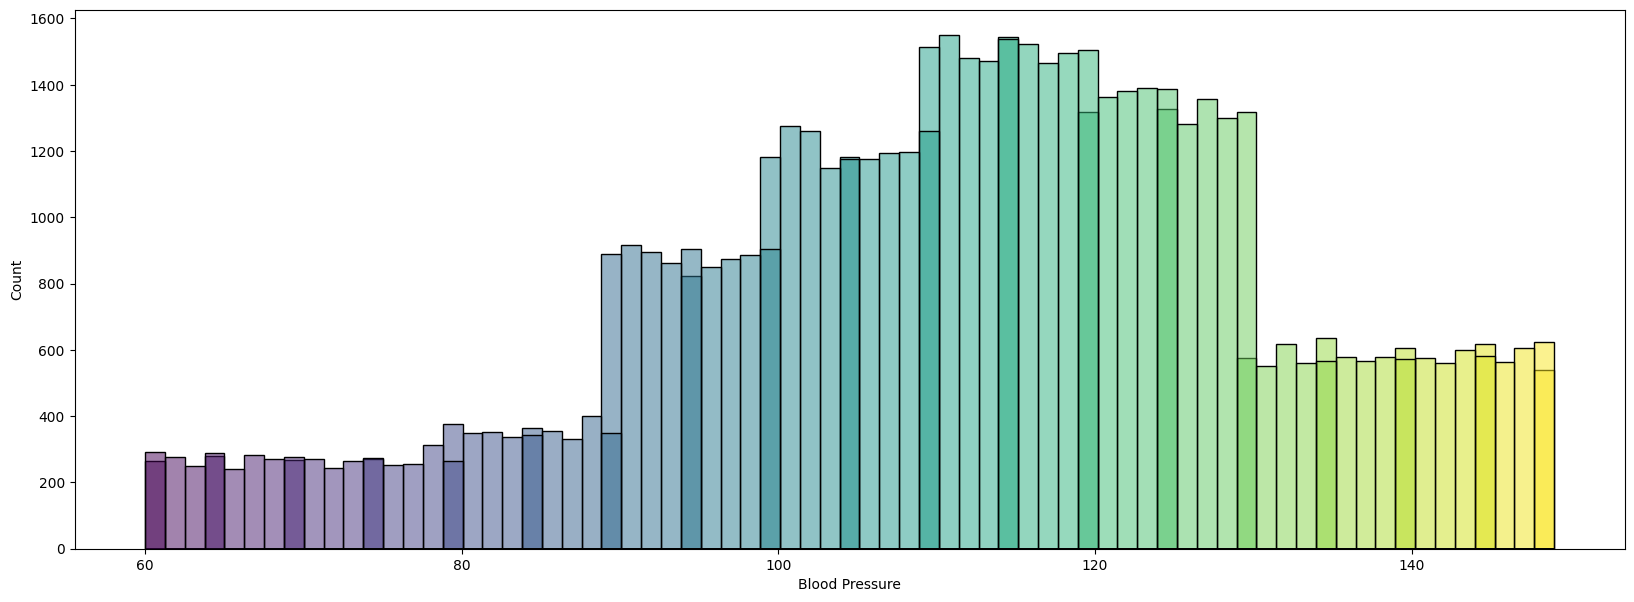

In [367]:
plt.figure(figsize=(20, 7))
sns.histplot(data=df, x='Blood Pressure', palette='viridis',legend=False,hue='Blood Pressure') 

##### The Blood Pressure is right skewed meaning that the people with high blood pressure are the highest

<div style="padding:10px;
            color:rgb(85, 88, 218);
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(128, 157, 221);
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Target column</b>
</div>

In [368]:
df['Target'].describe()

count     70000
unique       13
top        MODY
freq       5553
Name: Target, dtype: object

In [369]:
df['Target'].value_counts()

Target
MODY                                          5553
Secondary Diabetes                            5479
Cystic Fibrosis-Related Diabetes (CFRD)       5464
Type 1 Diabetes                               5446
Neonatal Diabetes Mellitus (NDM)              5408
Wolcott-Rallison Syndrome                     5400
Type 2 Diabetes                               5397
Prediabetic                                   5376
Gestational Diabetes                          5344
Type 3c Diabetes (Pancreatogenic Diabetes)    5320
Wolfram Syndrome                              5315
Steroid-Induced Diabetes                      5275
LADA                                          5223
Name: count, dtype: int64

In [370]:
df['Target'].unique()

array(['Steroid-Induced Diabetes', 'Neonatal Diabetes Mellitus (NDM)',
       'Prediabetic', 'Type 1 Diabetes', 'Wolfram Syndrome', 'LADA',
       'Type 2 Diabetes', 'Wolcott-Rallison Syndrome',
       'Secondary Diabetes', 'Type 3c Diabetes (Pancreatogenic Diabetes)',
       'Gestational Diabetes', 'Cystic Fibrosis-Related Diabetes (CFRD)',
       'MODY'], dtype=object)

<Axes: xlabel='Target', ylabel='count'>

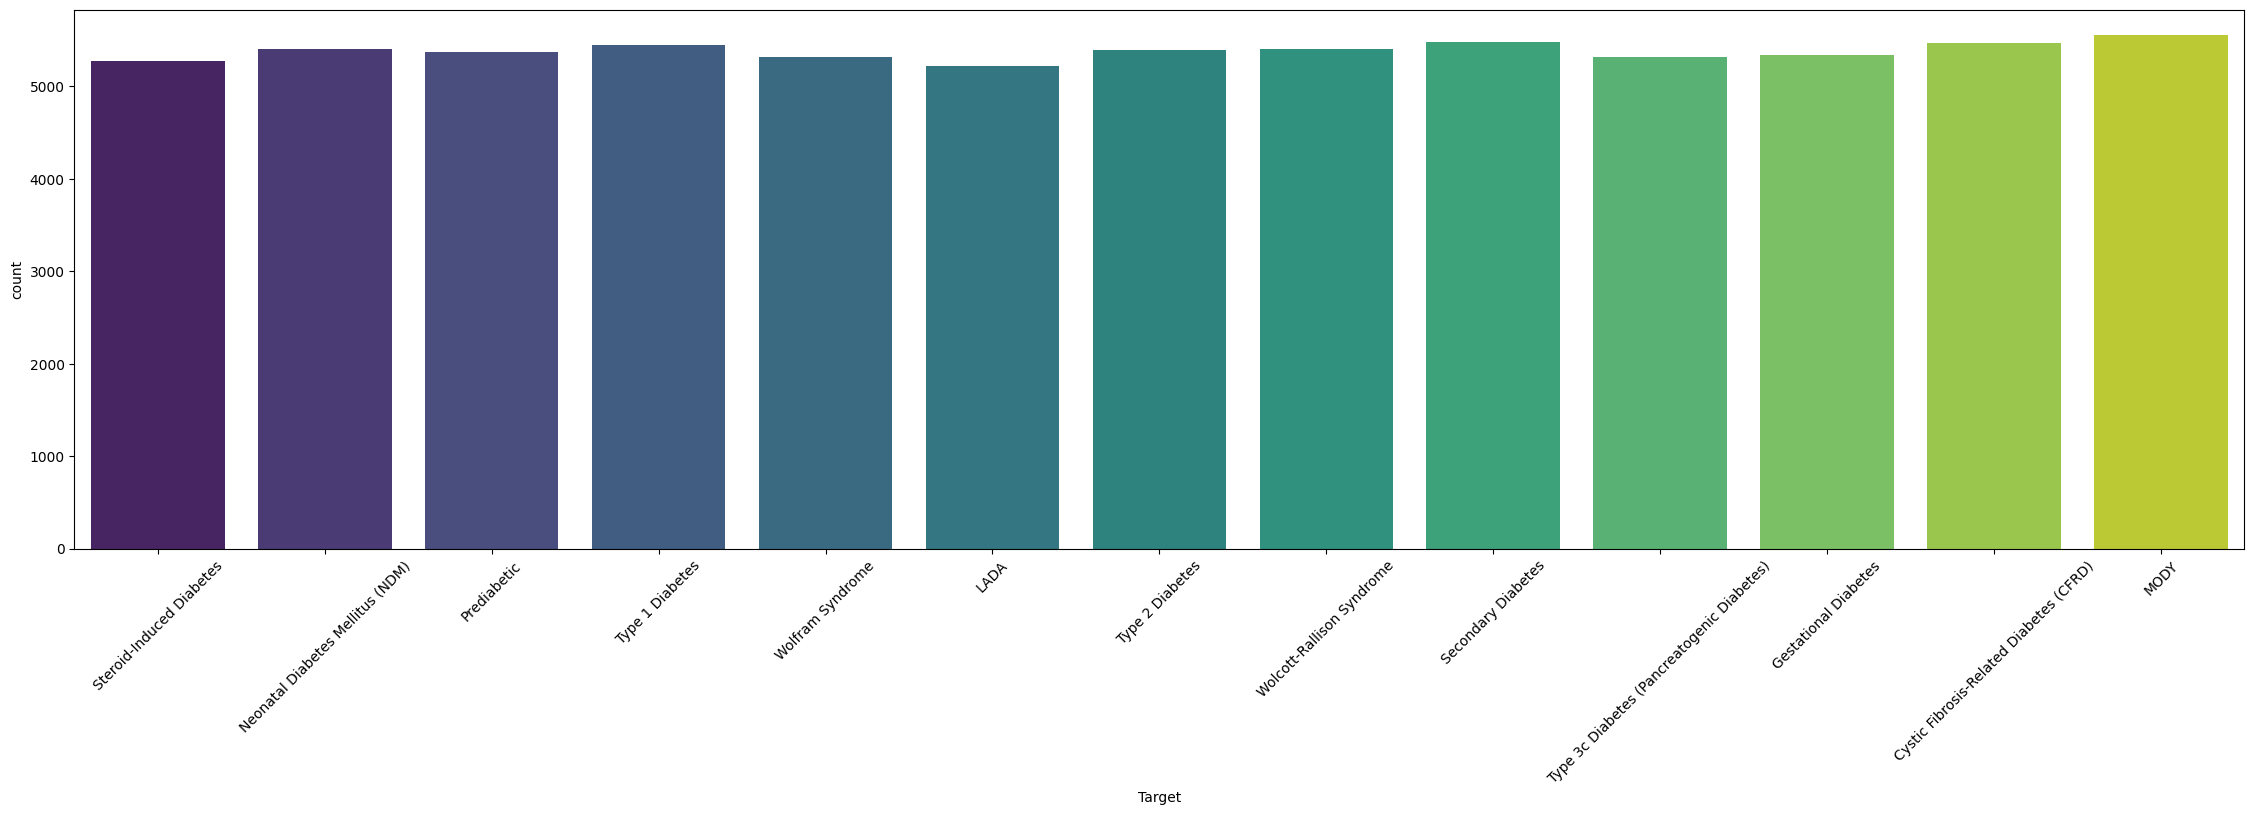

In [371]:
plt.figure(figsize=(28, 7))
plt.xticks(rotation=45)
sns.countplot(data=df, x='Target', palette='viridis',legend=False,hue='Target') 

<div style="padding:10px;
            color:rgb(85, 88, 218);
            margin:10px;
            font-size:175%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(128, 157, 221);
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>2.2 MultiVariate Analysis</b>
</div>

In [372]:
int_col = df.select_dtypes(include='number')
int_col.shape

(70000, 13)

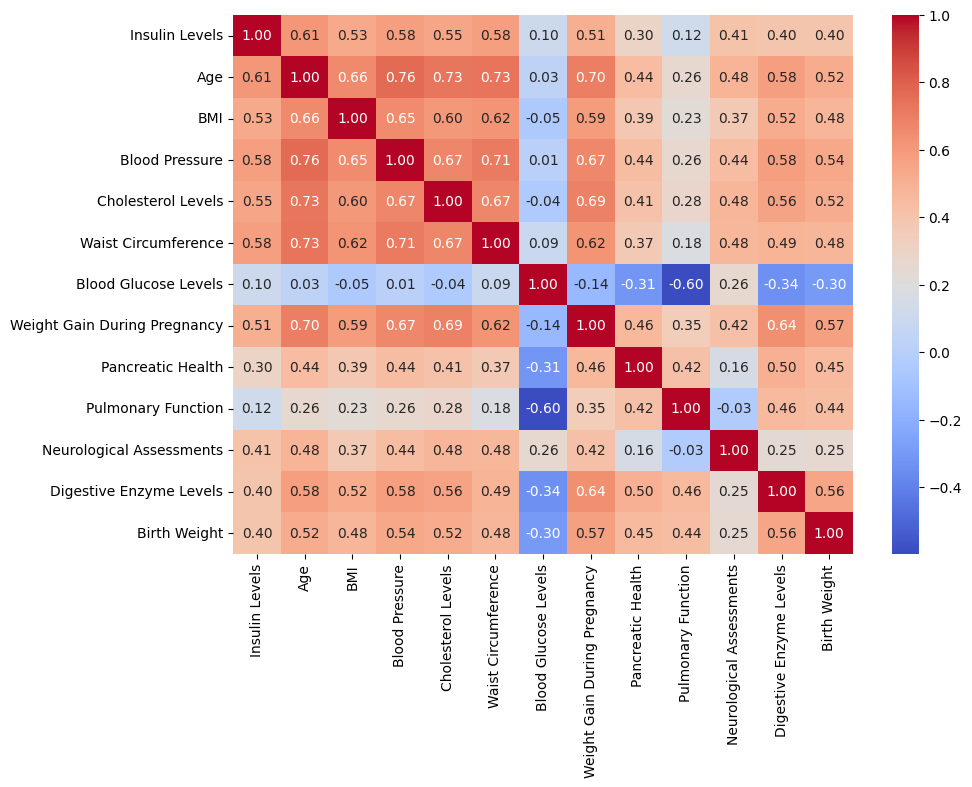

In [373]:
corr_matrix = int_col.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

<div style="padding:10px;
            color:rgb(85, 88, 218);
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(128, 157, 221);
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Insulin levels column VS Target column</b>
</div>

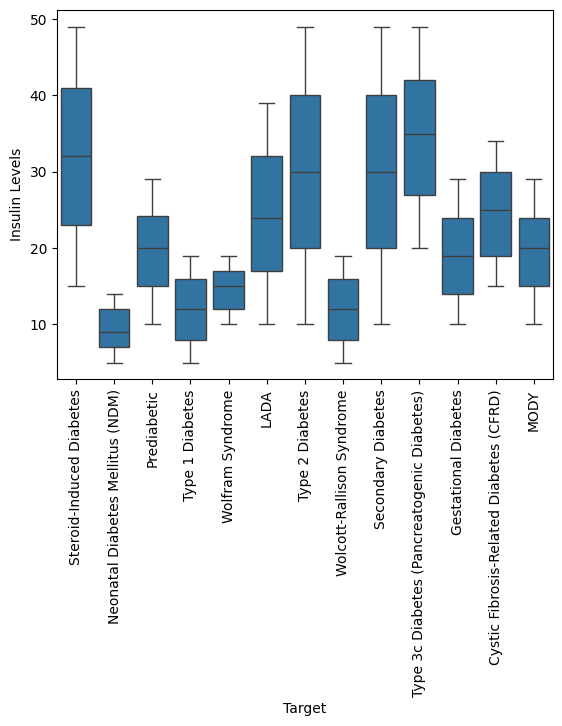

In [374]:
sns.boxplot(x='Target', y='Insulin Levels', data=df)
plt.xticks(rotation=90)
plt.show()

<div style="padding:10px;
            color:rgb(85, 88, 218);
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(128, 157, 221);
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Pancreatic health column VS Target column</b>
</div>

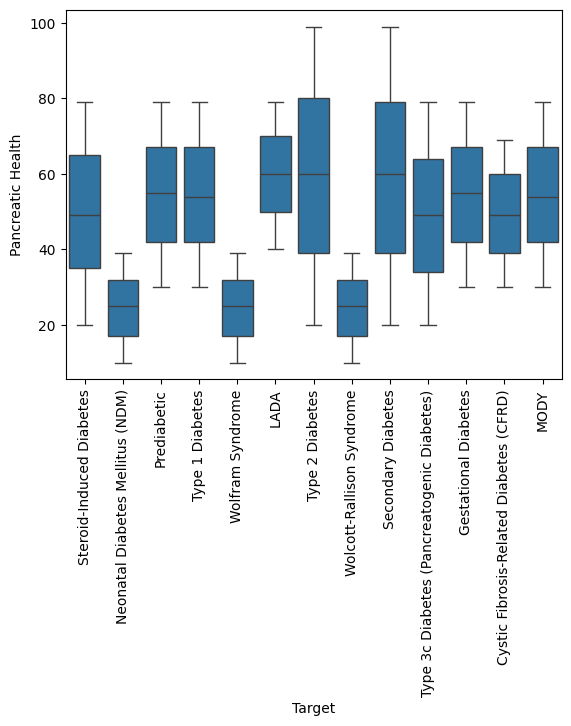

In [375]:
sns.boxplot(x='Target', y='Pancreatic Health', data=df)
plt.xticks(rotation=90)
plt.show()

<div style="padding:10px;
            color:rgb(85, 88, 218);
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(128, 157, 221);
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Alcohol Consumption column VS Target column</b>
</div>

Text(0.5, 0, 'diabetes type')

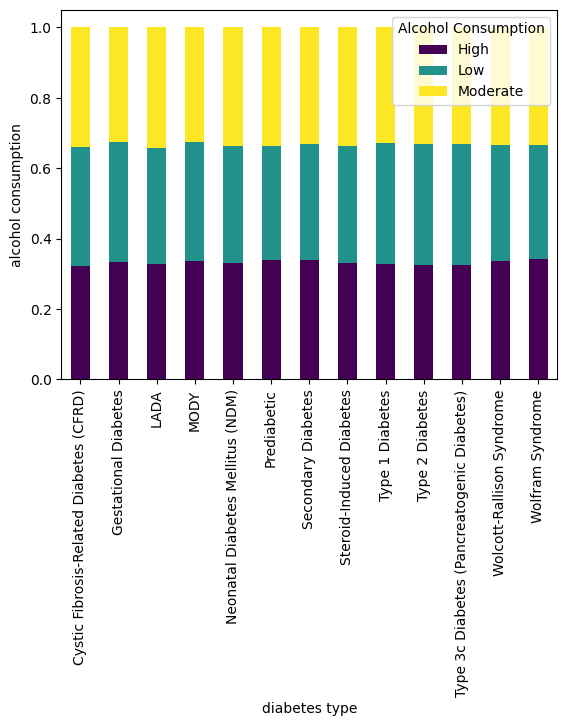

In [376]:
ct = pd.crosstab(df['Target'], df['Alcohol Consumption'] , normalize='index')
ct.plot(kind='bar' , stacked=True , colormap='viridis')
plt.ylabel('alcohol consumption')
plt.xlabel('diabetes type')

<div style="padding:10px;
            color:rgb(85, 88, 218);
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(128, 157, 221);
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Blood Pressure by Age column VS Diabetes Type</b>
</div>

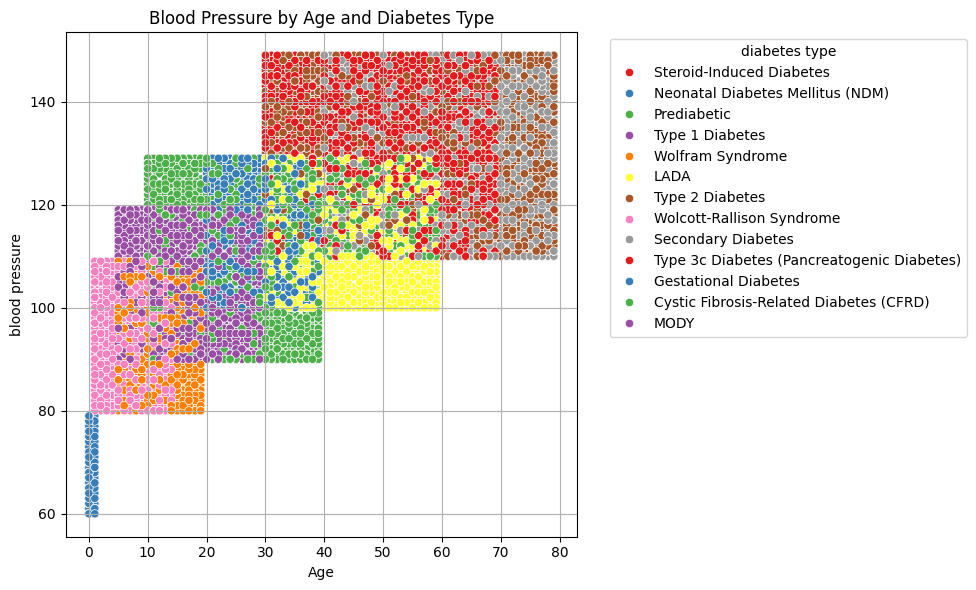

In [377]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Blood Pressure', hue='Target', data=df, palette='Set1')

plt.title('Blood Pressure by Age and Diabetes Type')
plt.grid(True)
plt.xlabel('Age')
plt.ylabel('blood pressure')

plt.legend(title='diabetes type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<div style="padding:10px;
            color:rgb(85, 88, 218);
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(128, 157, 221);
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Cholestrol Level by Age VS Diabetes Type </b>
</div>

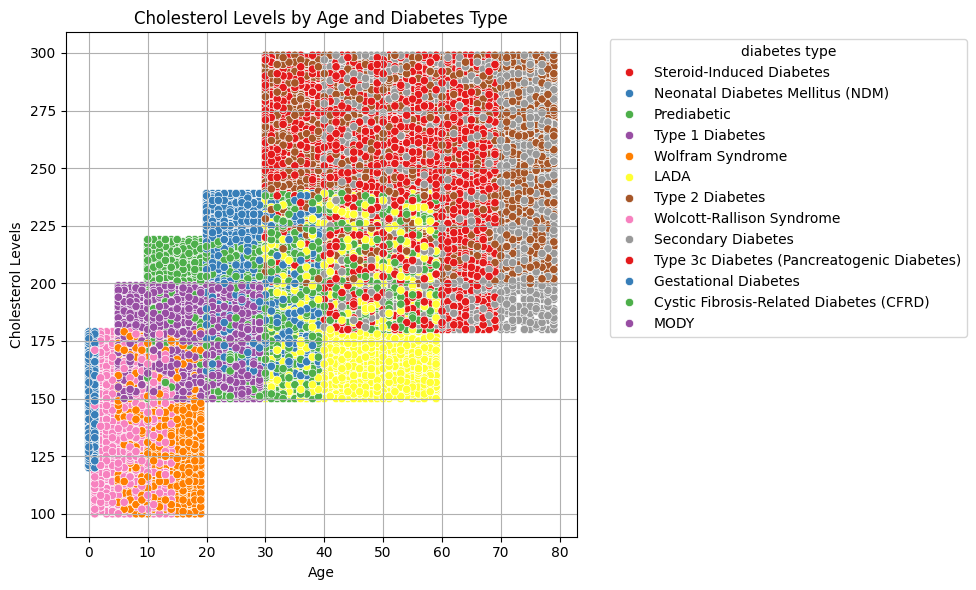

In [378]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Cholesterol Levels', hue='Target', data=df, palette='Set1')

plt.title('Cholesterol Levels by Age and Diabetes Type')
plt.grid(True)
plt.xlabel('Age')
plt.ylabel('Cholesterol Levels')

plt.legend(title='diabetes type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<div style="padding:10px;
            color:rgb(85, 88, 218);
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(128, 157, 221);
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>BMI by Waist Circumfrence VS Diabetes Type</b>
</div>

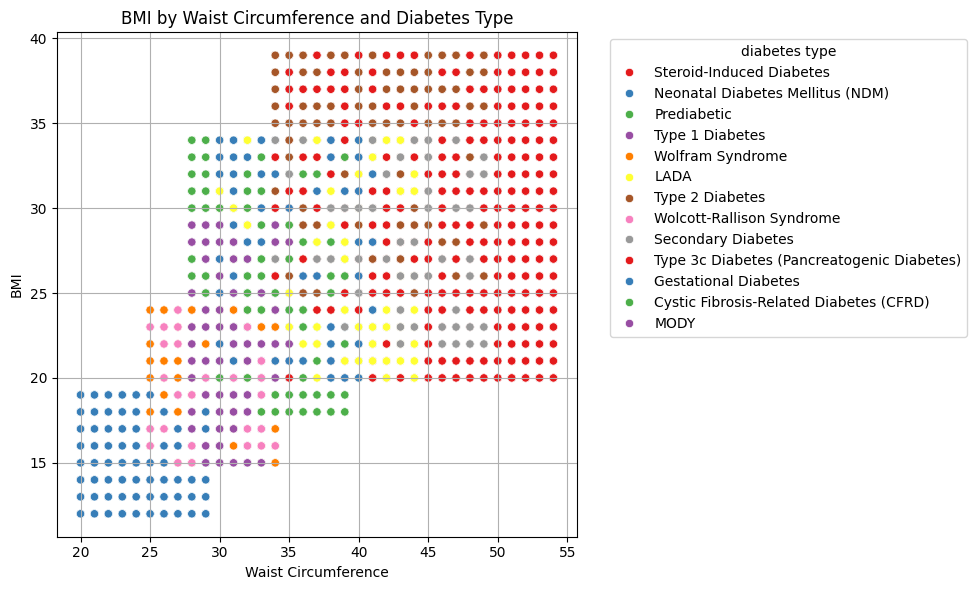

In [379]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Waist Circumference', y='BMI', hue='Target', data=df, palette='Set1')

plt.title('BMI by Waist Circumference and Diabetes Type')
plt.grid(True)
plt.xlabel('Waist Circumference')
plt.ylabel('BMI')

plt.legend(title='diabetes type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<div style="padding:10px;
            color:rgb(85, 88, 218);
            margin:10px;
            font-size:250%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(128, 157, 221);
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>3- Model Engineering</b>
</div>

## feature extraction

In [380]:
columns = [column for column in df.columns if df[column].dtype == 'object' and column != "Target" ]
print(columns)

['Genetic Markers', 'Autoantibodies', 'Family History', 'Environmental Factors', 'Physical Activity', 'Dietary Habits', 'Ethnicity', 'Socioeconomic Factors', 'Smoking Status', 'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS', 'Previous Gestational Diabetes', 'Pregnancy History', 'Cystic Fibrosis Diagnosis', 'Steroid Use History', 'Genetic Testing', 'Liver Function Tests', 'Urine Test', 'Early Onset Symptoms']


In [381]:
df_encoded = pd.get_dummies(df , columns =columns)
df_encoded.shape

(70000, 59)

In [382]:
df_encoded.columns

Index(['Target', 'Insulin Levels', 'Age', 'BMI', 'Blood Pressure',
       'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Neurological Assessments',
       'Digestive Enzyme Levels', 'Birth Weight', 'Genetic Markers_Negative',
       'Genetic Markers_Positive', 'Autoantibodies_Negative',
       'Autoantibodies_Positive', 'Family History_No', 'Family History_Yes',
       'Environmental Factors_Absent', 'Environmental Factors_Present',
       'Physical Activity_High', 'Physical Activity_Low',
       'Physical Activity_Moderate', 'Dietary Habits_Healthy',
       'Dietary Habits_Unhealthy', 'Ethnicity_High Risk', 'Ethnicity_Low Risk',
       'Socioeconomic Factors_High', 'Socioeconomic Factors_Low',
       'Socioeconomic Factors_Medium', 'Smoking Status_Non-Smoker',
       'Smoking Status_Smoker', 'Alcohol Consumption_High',
       'Alcohol Consumption_Low', 'Alcohol Consumption_M

In [383]:
# Convert multi-class target to numerical labels
label_encoder = LabelEncoder()
df_target_encoded = df
df_target_encoded['Target'] = label_encoder.fit_transform(df['Target']) #use label encoded in this case for target because model return one output but you can use one hot if you use NN
df_target_encoded.head(2)

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,7,Positive,Negative,No,Present,40,44,38,High,Healthy,...,76,No,No,Positive,3,Normal,56,Ketones Present,2629,No
1,4,Positive,Negative,No,Present,13,1,17,High,Healthy,...,60,Yes,No,Negative,1,Normal,28,Glucose Present,1881,Yes


In [384]:
df_target_encoded.shape

(70000, 34)

In [385]:
df_encoded = pd.get_dummies(df_target_encoded , columns =columns)
df_encoded.shape

(70000, 59)

In [386]:
correlation_matrix1 = df_encoded[df_encoded.columns[:20]].corr()

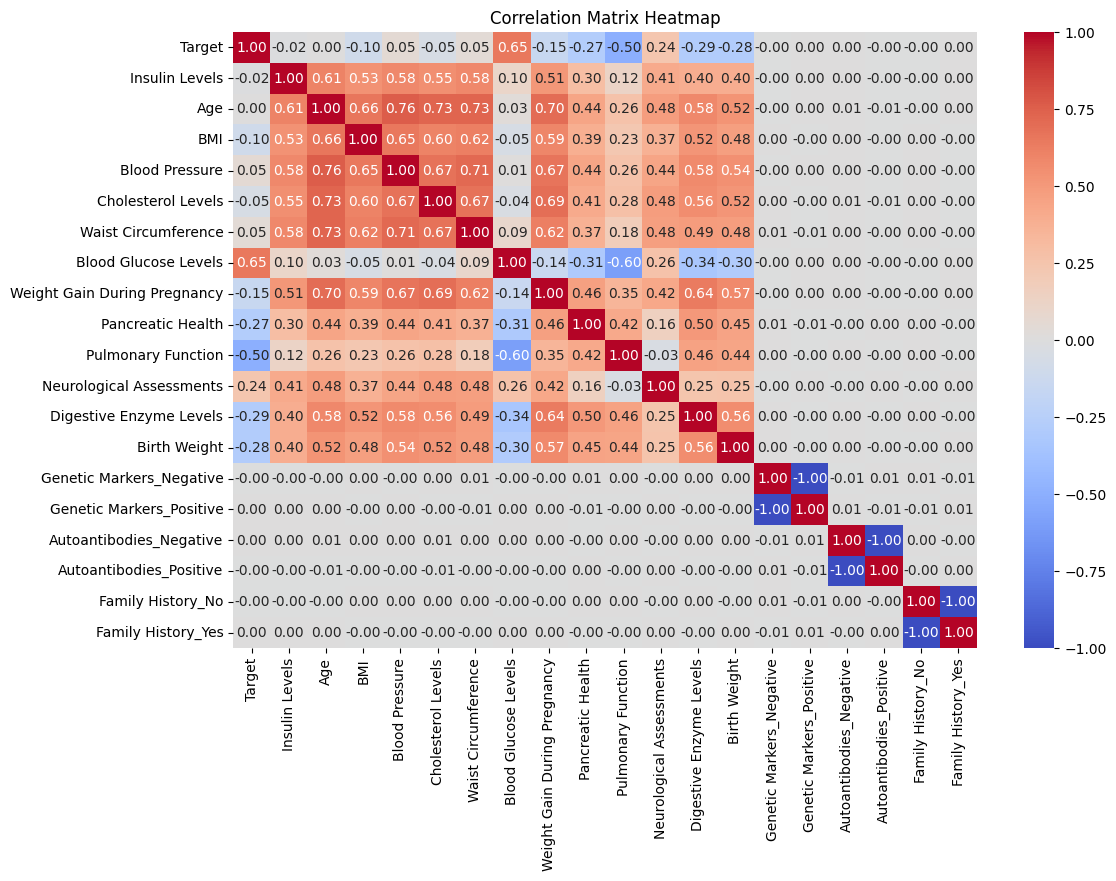

In [387]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [388]:
selected_columns = [df_encoded.columns[0]] + list(df_encoded.columns[20:40])

correlation_matrix2 = df_encoded[selected_columns].corr()

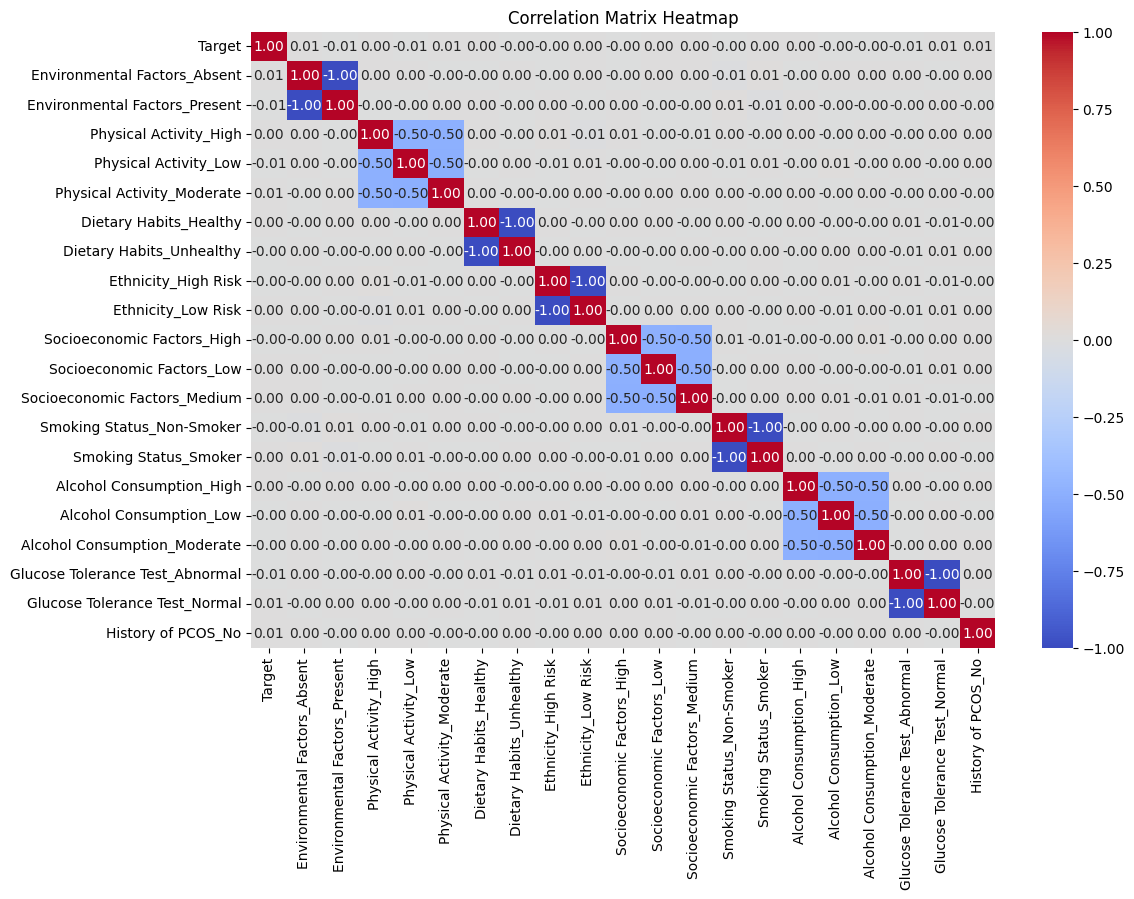

In [389]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [390]:
selected_columns3 = [df_encoded.columns[0]] + list(df_encoded.columns[20:40])
correlation_matrix3 = df_encoded[selected_columns3].corr()

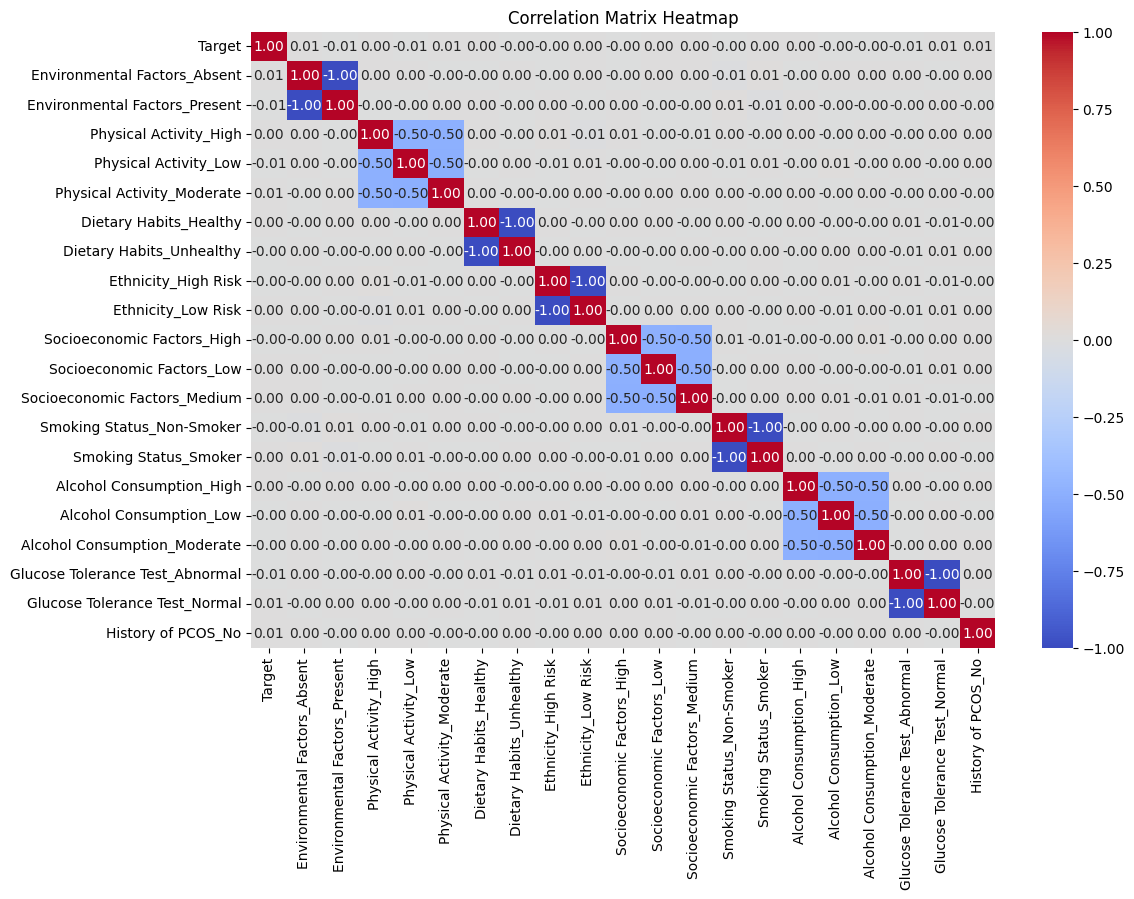

In [391]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

## --------------------------- (info) --------------------------
this is a good info is the features will be 13 only from correlation i can know what has effect on target now i can do my train

------------------------------------------------------

# feature selection

In [392]:
final_df = df_encoded[df_encoded.columns[:13]]

In [393]:
final_correlation = final_df.corr()

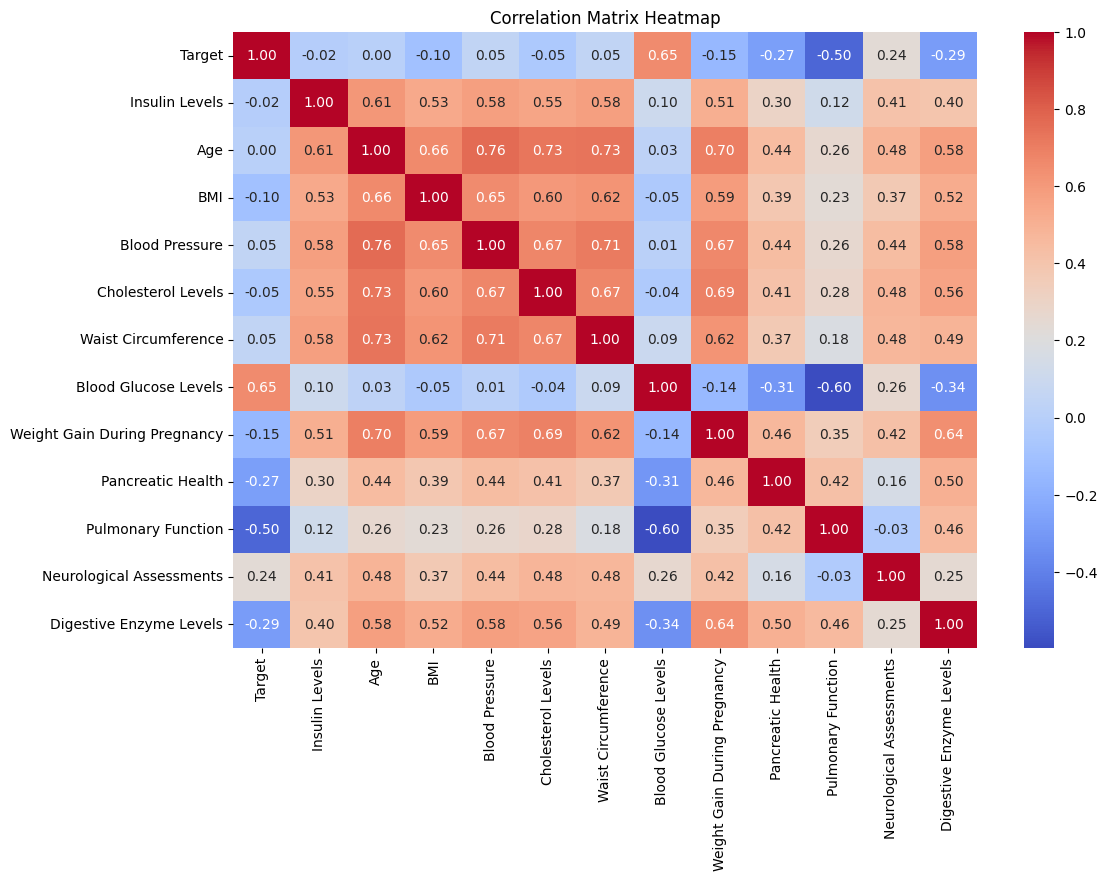

In [394]:
plt.figure(figsize=(12, 8))
sns.heatmap(final_correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# for good model you should do scaling in all features convert the categorical data to numirical by one hot encoding

# after scaling ready to modeling

In [395]:
from sklearn.preprocessing import StandardScaler

x = df_encoded.drop(columns = ['Target'])
y = df_encoded['Target']

scaler  = StandardScaler()
x_scaled = scaler.fit_transform(x)
type(x_scaled)

numpy.ndarray

In [396]:
x_scaled = pd.DataFrame(x_scaled ,  columns = x.columns)
x_scaled.head(2)

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,...,Genetic Testing_Negative,Genetic Testing_Positive,Liver Function Tests_Abnormal,Liver Function Tests_Normal,Urine Test_Glucose Present,Urine Test_Ketones Present,Urine Test_Normal,Urine Test_Protein Present,Early Onset Symptoms_No,Early Onset Symptoms_Yes
0,1.705261,0.569277,2.197644,0.634773,0.137716,2.197183,0.151527,0.259896,-0.578659,0.479322,...,-0.991040,0.991040,-0.999457,0.999457,-0.575635,1.737213,-0.577966,-0.580166,0.998316,-0.998316
1,-0.798037,-1.474156,-1.294096,-1.922277,-1.658739,-1.624429,0.359146,-0.778199,-1.079046,-0.857855,...,1.009041,-1.009041,-0.999457,0.999457,1.737213,-0.575635,-0.577966,-0.580166,-1.001687,1.001687
